In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import metrics

from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier

from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
df = pd.read_csv('Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


# EDA

In [3]:
df.shape

(1000, 40)

In [4]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

###### As we can see there is no use of Policy no so dropign it and also changeing datimg from string 

In [5]:
df.drop('policy_number',axis=1,inplace=True)
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['insured_zip'] = df['insured_zip'].apply(str)
df['bodily_injuries'] = df['bodily_injuries'].apply(str)
df['incident_date'] = pd.to_datetime(df['incident_date'])

In [6]:
for column_data in df.dtypes.items():
    column, dtype = column_data
    if dtype == 'object':
        print(column)
        print(df[column].value_counts())
        print('-'*30)

policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
------------------------------
policy_csl
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
------------------------------
insured_zip
477695    2
431202    2
446895    2
456602    2
469429    2
         ..
457793    1
601425    1
445856    1
443567    1
460564    1
Name: insured_zip, Length: 995, dtype: int64
------------------------------
insured_sex
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
------------------------------
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
------------------------------
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
other-service        71
priv-h

In [7]:
# Location don't mater much as we have the ZIP code so droping it 
df.drop(['incident_location'],axis=1,inplace=True)

In [8]:
df.columns


Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [9]:
df.shape

(1000, 38)

In [10]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                   0
bodily_injuries                   0
witnesses                   

##### We can see there is all null in _c39 so dropign it 

In [11]:
df.drop('_c39',axis=1,inplace=True)

# EDA

<AxesSubplot:>

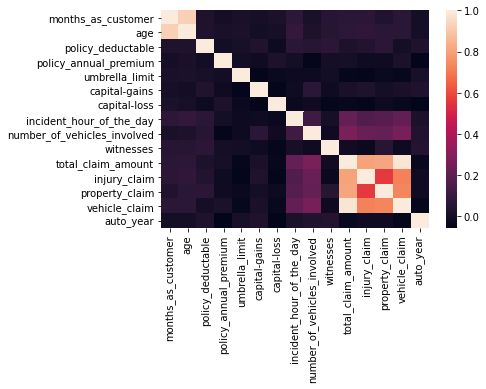

In [12]:
sns.heatmap(df.corr())

In [13]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_bind_date             1000 non-null   datetime64[ns]
 3   policy_state                 1000 non-null   object        
 4   policy_csl                   1000 non-null   object        
 5   policy_deductable            1000 non-null   int64         
 6   policy_annual_premium        1000 non-null   float64       
 7   umbrella_limit               1000 non-null   int64         
 8   insured_zip                  1000 non-null   object        
 9   insured_sex                  1000 non-null   object        
 10  insured_education_level      1000 non-null   object        
 11  insured_occupation           1000 non-null  

# Univariate Analysis

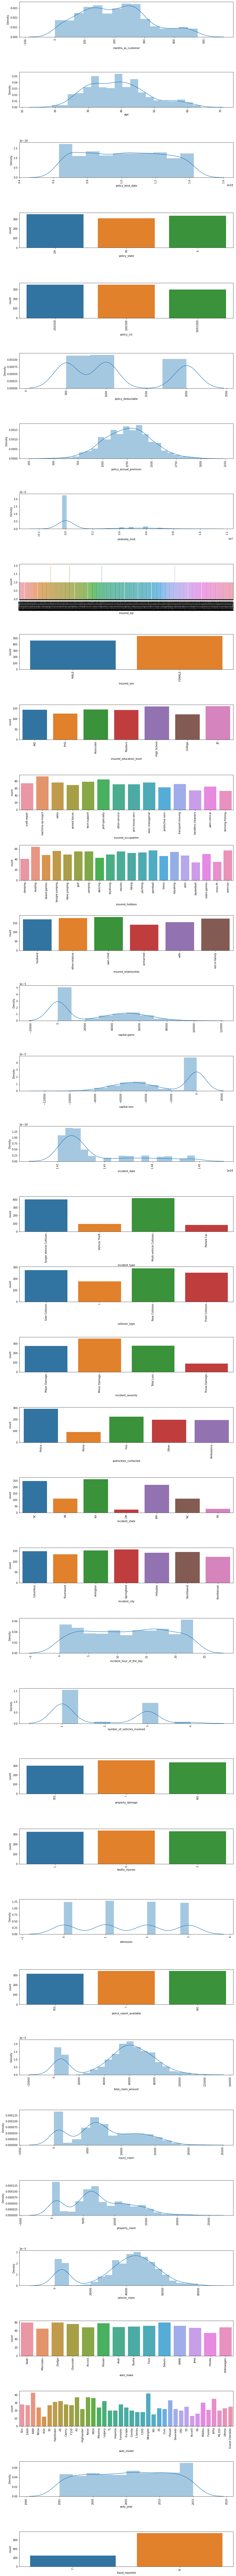

In [15]:
plt.figure(figsize=[15,200])
for i, column_data in enumerate(df.dtypes.items()):
    column,dtype = column_data
    plt.subplot(40,1,i+1)
    plt.subplots_adjust(hspace=1)
    
    if dtype == 'object':
        plt.xticks(rotation=90)
        sns.countplot(df[column])
    else:
        plt.xticks(rotation=90)
        sns.distplot(df[column],kde=True)


###### We can say that 
* Very Less Fraud case are there 
* Female are more insured than male 
* Most of the colission are single or multiple

# Bivariate Analysis

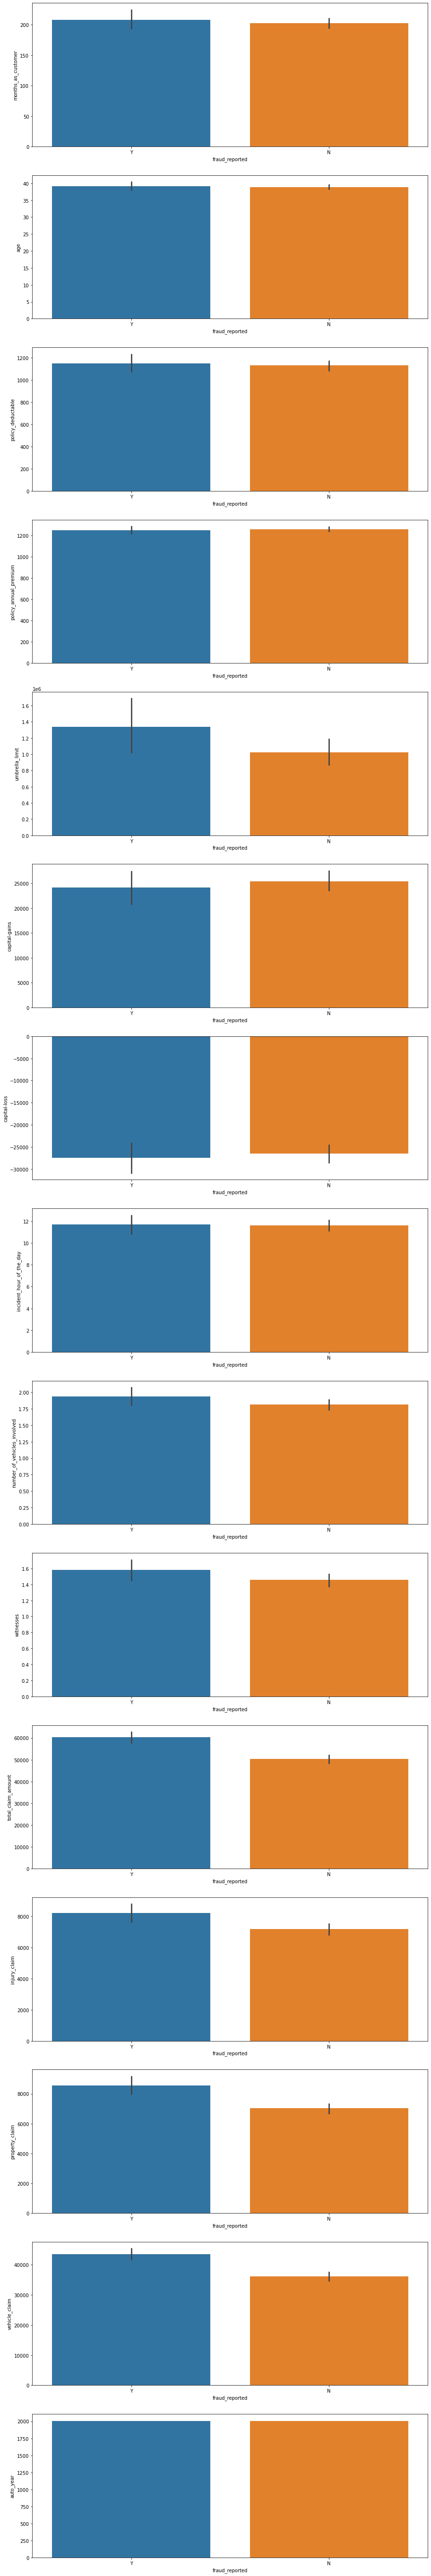

In [16]:
plt.figure(figsize=[15,200])
j = 0 
for column, dtype in df.drop(['fraud_reported','policy_bind_date','incident_date'],axis=1).dtypes.items():
    if dtype != 'object':
        plt.subplot(30,1,j+1)   
        sns.barplot(df['fraud_reported'],df[column],)
        j += 1

###### We can see that 
* More Unmera limit more fraud reported
* High claim vechinal report more fraud 
* High Property Claim reported more fraud
* When high claim amount then more chance of fraud

# Checking for outliers

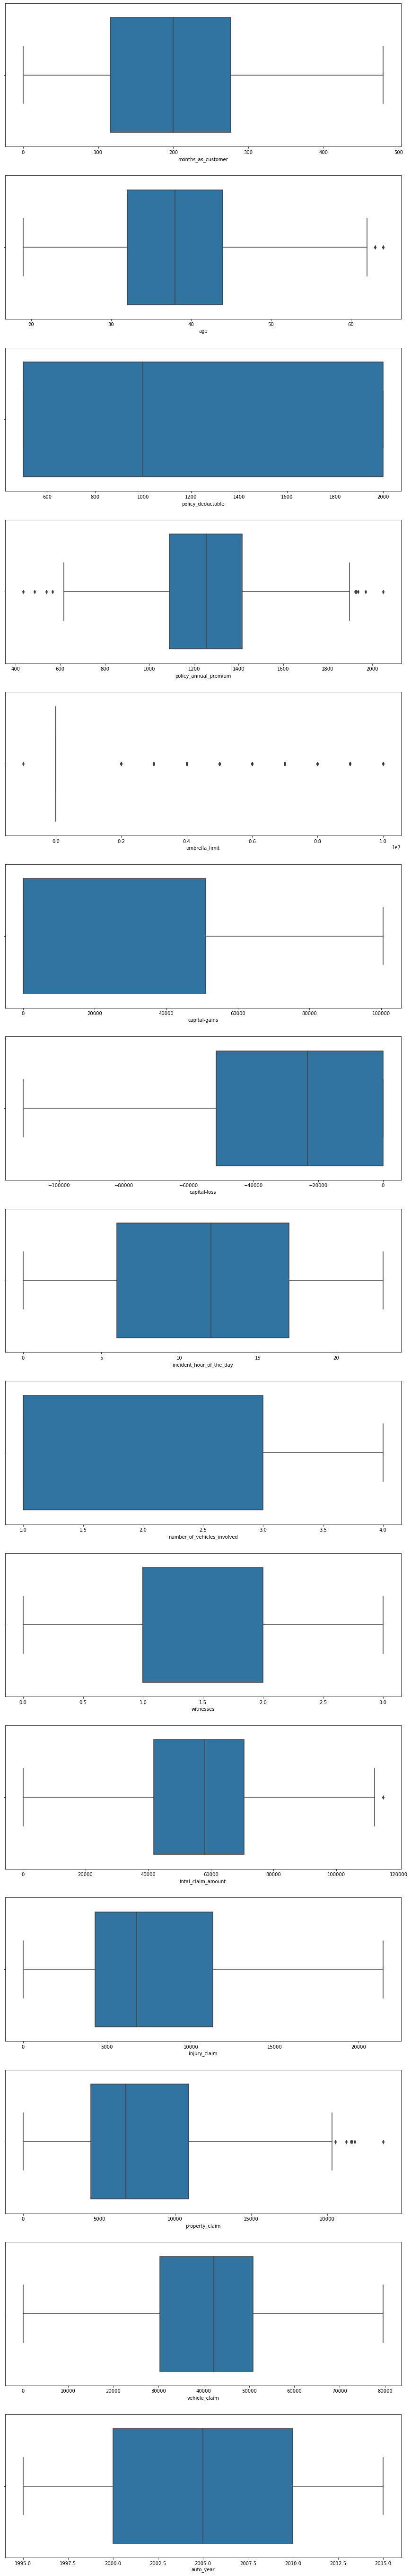

In [17]:
plt.figure(figsize=[15,200])
df_conti = df.drop(['fraud_reported','policy_bind_date','incident_date'],axis=1)
j = 0 
for column, dtype in df_conti.dtypes.items():
    if dtype != 'object':
        plt.subplot(30,1,j+1)    
        sns.boxplot(df[column],)
        j += 1

##### WE can see there is a outliers present lets see how many

In [18]:
conti_column = [column[0] for column in df.dtypes.items() if column[1] != 'object' and column[1] != '<M8[ns]']
df[np.abs(stats.zscore(df[conti_column]))>3]

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
31,166,37,2008-06-19,IL,100/300,2000,1337.28,8000000,610393,MALE,...,2,?,67140,7460,7460,52220,Ford,F150,2006,Y
48,175,34,2008-07-01,IN,500/1000,1000,1123.87,8000000,446326,FEMALE,...,0,YES,7290,810,810,5670,Volkswagen,Passat,1995,N
88,31,36,1999-08-15,IL,500/1000,2000,1318.24,9000000,601748,FEMALE,...,1,YES,4700,940,470,3290,Dodge,Neon,2002,N
115,258,46,1999-09-03,IN,100/300,1000,1110.37,10000000,455365,MALE,...,1,?,47700,4770,9540,33390,Accura,MDX,1997,Y
119,245,39,2001-04-21,OH,250/500,500,964.79,8000000,460675,FEMALE,...,1,?,72820,13240,6620,52960,BMW,3 Series,2010,N
229,154,37,2010-01-28,IL,250/500,1000,2047.59,0,439269,FEMALE,...,3,NO,79530,14460,7230,57840,Accura,MDX,2000,N
248,101,27,2007-10-02,IL,250/500,1000,433.33,0,603269,MALE,...,3,NO,5900,1180,590,4130,Mercedes,E400,2009,N
262,232,43,2001-05-16,OH,250/500,500,1483.91,8000000,431531,MALE,...,1,?,70600,7060,14120,49420,Volkswagen,Passat,2013,Y
314,91,30,2010-06-18,IL,250/500,2000,1316.63,8000000,613178,FEMALE,...,0,?,84500,13000,13000,58500,BMW,X6,2009,N
430,264,47,2005-07-03,IN,250/500,2000,1181.46,10000000,601117,FEMALE,...,2,YES,62370,5670,5670,51030,Dodge,Neon,2001,N


###### We can see very less no of outliers there so leaving it

# Doing Label Encoding

In [19]:
df = df.apply(LabelEncoder().fit_transform)

# Spliting the Data

In [20]:
X = df.drop('fraud_reported',axis=1)
y = df['fraud_reported']

# Checking Skew

In [21]:
df.skew().abs().sort_values()

insured_education_level        0.000148
insured_zip                    0.001683
total_claim_amount             0.003492
policy_annual_premium          0.004022
incident_date                  0.005157
vehicle_claim                  0.014526
bodily_injuries                0.014777
auto_make                      0.018797
witnesses                      0.019636
policy_bind_date               0.023500
policy_state                   0.026177
incident_hour_of_the_day       0.035584
auto_year                      0.048289
incident_city                  0.049531
police_report_available        0.052967
insured_occupation             0.058881
insured_hobbies                0.061563
policy_deductable              0.063505
property_claim                 0.071055
insured_relationship           0.077488
auto_model                     0.080773
policy_csl                     0.088928
months_as_customer             0.092231
incident_type                  0.101507
injury_claim                   0.105325


###### There a little skenewss 

# Doing Power Transform

In [22]:
X_transformed = PowerTransformer().fit_transform(X)
X = pd.DataFrame(X_transformed,columns=X.columns)

# Building Model

In [23]:
models = {
    'logisticRegression' : LogisticRegression(),
    'decisionTreeClassifier' : DecisionTreeClassifier(),
    'svc' : SVC(probability=True),
    'kNeighborsClassifier' : KNeighborsClassifier()
}

In [24]:
def build_model(model_obj):
    
    name, model = model_obj
        
    print('----------------------------------')
    print('*****',name,'******')
    print('----------------------------------')
    
    multi_class = False
    
    if len(y_train.value_counts()) > 2:
        multi_class = True
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy_score = metrics.accuracy_score(y_test,y_pred)
    confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
    
    if not multi_class:
        y_pred_proba = model.predict_proba(X_test)[::,1]
        fpr, tpr , _ = metrics.roc_curve(y_test,y_pred_proba)
        auc = metrics.roc_auc_score(y_test,y_pred_proba)
    
        plt.figure(figsize=(5,5))
        plt.plot(fpr,tpr)
        plt.title('AUC ROC Curve for ' + name)
    
        print('auc: ',auc)
        plt.show()
    
    
    kFold = KFold(n_splits=3,shuffle=True,random_state=42)
    scores = cross_val_score(model,X,y,cv=kFold,scoring='accuracy',n_jobs=-1)
    
    mean_cv_scores = np.mean(scores)
    std_cv_scores = np.std(scores)
    
    diff_acc_score_cv_score = np.abs(accuracy_score - mean_cv_scores)
    
    print('Confussion matrix: \n',confusion_matrix)
    print('\nscore: ',accuracy_score)
    
    print('Cross Val Score: ',mean_cv_scores)
    print('Cross Val std: ',std_cv_scores)
    print('Diff Between score and CV score: ', diff_acc_score_cv_score)
    print('__________________________________________\n'*2)
    
    return (name, accuracy_score, mean_cv_scores, std_cv_scores, diff_acc_score_cv_score, model)

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,shuffle=True)

----------------------------------
***** logisticRegression ******
----------------------------------
auc:  0.7183753364325912


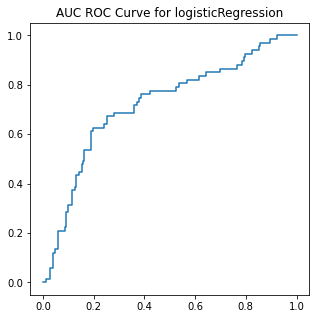

Confussion matrix: 
 [[162  21]
 [ 42  25]]

score:  0.748
Cross Val Score:  0.7660414905923888
Cross Val std:  0.03282022664838996
Diff Between score and CV score:  0.018041490592388798
__________________________________________
__________________________________________

----------------------------------
***** decisionTreeClassifier ******
----------------------------------
auc:  0.6506402414158714


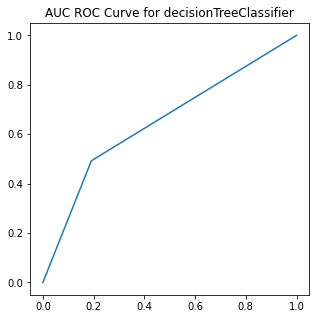

Confussion matrix: 
 [[148  35]
 [ 34  33]]

score:  0.724
Cross Val Score:  0.7960415505325685
Cross Val std:  0.03097443569699585
Diff Between score and CV score:  0.07204155053256855
__________________________________________
__________________________________________

----------------------------------
***** svc ******
----------------------------------
auc:  0.7000652475328277


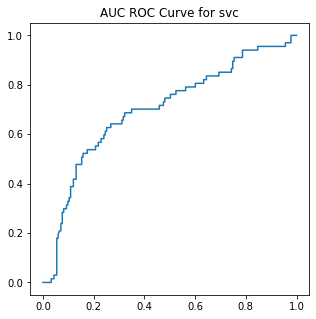

Confussion matrix: 
 [[173  10]
 [ 57  10]]

score:  0.732
Cross Val Score:  0.7480294665923409
Cross Val std:  0.02140532887359731
Diff Between score and CV score:  0.016029466592340946
__________________________________________
__________________________________________

----------------------------------
***** kNeighborsClassifier ******
----------------------------------
auc:  0.6309844221515374


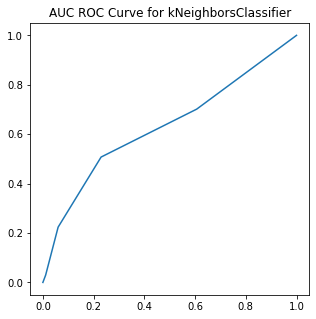

Confussion matrix: 
 [[172  11]
 [ 52  15]]

score:  0.748
Cross Val Score:  0.7460094825364286
Cross Val std:  0.007139416403622366
Diff Between score and CV score:  0.001990517463571373
__________________________________________
__________________________________________



In [26]:
final_model_list = []
for one_model in models.items():
    
    name, accuracy_score, mean_cv_scores, std_cv_scores, diff_acc_score_cv_score, model = build_model(one_model)
    final_model_list.append({
        'name': name,
        'accuracy_score': accuracy_score,
        'mean_cv_scores': mean_cv_scores,
        'std_cv_scores': std_cv_scores,
        'diff_acc_score_cv_score': diff_acc_score_cv_score,
        'model': model,

    })

# Grid search CV with best model

In [27]:
# The Best model is 
sorted(final_model_list,key=lambda item : item['diff_acc_score_cv_score'])[0]['name']

'kNeighborsClassifier'

In [28]:
kNeighborsClassifier = sorted(final_model_list,key=lambda item : item['diff_acc_score_cv_score'])[0]['model']

In [29]:
param_grid = {
    'n_neighbors': [5,6,7],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'weights': ['uniform','distance'],
    'leaf_size' : [30,40],
    
}
gridSearchCV = GridSearchCV(KNeighborsClassifier(),param_grid=param_grid,n_jobs=-1)
gridSearchCV.fit(X_train,y_train)
print(gridSearchCV.best_score_)
print(gridSearchCV.best_params_)

0.7613333333333333
{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 7, 'weights': 'uniform'}


# Saving the Model

In [30]:
pickle.dump(kNeighborsClassifier,open('kNeighborsClassifier_primary_fuel.pkl','wb'))